In [8]:
import matplotlib.pyplot as plt

In [ ]:
Cy3=[0.293003894,
0.167267874,
0.211006733,
0.141330793,
0.16207032,
0.249831043,
0.400038438,
0.333785998,
0.154876957,
1.067285192,
0.146952852,
0.17916459,
0.268266412,
1.019611736,
0.92414233,
0.30890279,
0.157757681,
1.051749554,
0.922220439,
0.230705059,
0.463346794,
0.387461668,
0.46394786,
0.265651796,
0.322142718,
0.91620133,
0.216772406,
0.285973153,
0.242810861,
0.215179982,
0.455995033,
0.496236473,
0.292317505,
0.647149265,
0.555388475,
0.972907673,
0.228225609,
0.9777652,
0.978196041,
0.144551545,
0.30482458,
0.461691011,
0.831625455,
0.271852534,
0.947602071
]

In [10]:
Cy5=[0.189028092,
0.512790548,
0.300451124,
0.742004139,
0.471234051,
0.250570705,
0.106937907,
0.445685597,
0.338721576,
0.074136216,
0.199948207,
0.306191909,
0.472511474,
0.190549248,
0.071724999,
0.210485312,
0.22619957,
0.077254695,
0.078094703,
0.388168933,
0.281296312,
0.089223732,
0.145550021,
0.151510601,
0.486665404,
0.06956622,
0.460594665,
0.622424753,
0.17705035,
0.306859999,
0.587327183,
0.521366908,
0.515647884,
0.071738057,
0.273947323,
0.072528013,
0.558871342,
0.069019997,
0.065699133,
0.636630912,
0.101845626,
0.652897922,
0.077235109,
0.590569704,
0.07374015




]

In [22]:
predicted=[1,
2,
1,
2,
2,
1,
1,
2,
1,
0,
1,
1,
2,
0,
0,
1,
1,
0,
0,
1,
1,
1,
1,
1,
2,
0,
1,
2,
1,
1,
2,
2,
2,
0,
0,
0,
2,
0,
0,
2,
1,
2,
0,
2,
0



]

In [23]:
truth=[1,
2,
1,
2,
2,
1,
1,
2,
2,
0,
1,
1,
2,
1,
0,
1,
1,
0,
0,
2,
2,
1,
1,
1,
2,
0,
2,
2,
1,
2,
2,
2,
2,
0,
1,
0,
2,
0,
0,
2,
1,
2,
0,
2,
0
]

In [55]:
color=['rgba(0, 0, 255,1)' if 1==truth[i] else ('rgba(0, 255, 0,1)' if 0==truth[i] else ('rgba(255, 0, 0,1)' if 2==truth[i] else 12 )) for i in range(45)]

(0.0, 1.05)

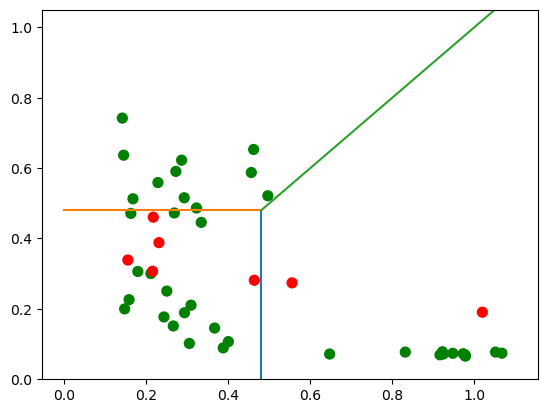

In [38]:
plt.scatter(Cy3,Cy5,c=color, s=50)

plt.plot([0.48,0.48],[0,0.48])
plt.plot([0,0.48],[0.48,0.48])
plt.plot([0.48,1.1],[0.48,1.1])
plt.ylim([0,1.05])
plt.ylim([0,1.05])

In [58]:
import plotly.graph_objects as go
import numpy as np

# Create scatter plot
scatter = go.Scatter(
    x=Cy3,
    y=Cy5,
    mode='markers',
    marker=dict(
        color=color,
        size=10,
        showscale=False
    ),
    name='Data Points'
)

# Create the line segments
line1 = go.Scatter(
    x=[0.4, 0.4],
    y=[0, 0.4],
    mode='lines',
    line=dict(color='black', width=2),
    showlegend=False
)

line2 = go.Scatter(
    x=[0, 0.4],
    y=[0.4, 0.4],
    mode='lines',
    line=dict(color='black', width=2),
    showlegend=False
)

line3 = go.Scatter(
    x=[0.4, 1.1],
    y=[0.4, 1.1],
    mode='lines',
    line=dict(color='black', width=2),
    showlegend=False
)

# Region 1: y > 0.48 and y > x (above both horizontal and diagonal)
# This region exists for x from 0 to 1.1
x1 = np.linspace(0, 1.1, 100)
# Lower boundary: the maximum of 0.48 and x (whichever is higher)
y1_lower = np.maximum(0.4, x1)
# Upper boundary: top of plot at y=1.05
y1_upper = np.full_like(x1, 1.05)

region1 = go.Scatter(
    x=np.concatenate([x1, x1[::-1]]),
    y=np.concatenate([y1_lower, y1_upper[::-1]]),
    fill='toself',
    fillcolor='rgba(255, 0, 0, 0.3)',  # Red
    line=dict(width=0),
    name='Setosa',
    showlegend=True
)

# Region 2: x > 0.48 and x > y (right of vertical and below diagonal)
# This region exists for x from 0.48 to 1.1
x2 = np.linspace(0.4, 1.1, 100)
# Lower boundary: bottom of plot at y=0
y2_lower = np.full_like(x2, 0)
# Upper boundary: the minimum of 0.48 and x (but since x>0.48, it's just the diagonal y=x)
y2_upper = x2  # Diagonal line y=x

region2 = go.Scatter(
    x=np.concatenate([x2, x2[::-1]]),
    y=np.concatenate([y2_lower, y2_upper[::-1]]),
    fill='toself',
    fillcolor='rgba(0, 255, 0, 0.3)',  # Green
    line=dict(width=0),
    name='Virginica',
    showlegend=True
)

# Region 3: x < 0.48 and y < 0.48 (bottom-left square)
# This region exists for x from 0 to 0.48
x3 = np.linspace(0, 0.4, 100)
# Lower boundary: bottom of plot at y=0
y3_lower = np.full_like(x3, 0)
# Upper boundary: horizontal line at y=0.48
y3_upper = np.full_like(x3, 0.4)

region3 = go.Scatter(
    x=np.concatenate([x3, x3[::-1]]),
    y=np.concatenate([y3_lower, y3_upper[::-1]]),
    fill='toself',
    fillcolor='rgba(0, 0, 255, 0.3)',  # Blue
    line=dict(width=0),
    name='Versicolor',
    showlegend=True
)

# Create figure
# Add regions first (background), then lines, then scatter points (foreground)
fig = go.Figure(data=[region1, region2, region3, line1, line2, line3, scatter])

# Set layout
fig.update_layout(
    xaxis=dict(
        title='Cy3',
        range=[0, 1.1]
    ),
    yaxis=dict(
        title='Cy5',
        range=[0, 1.05]
    ),
    width=800,
    height=600,
    showlegend=True,
    plot_bgcolor='white'
)

# Show the figure
fig.show()